Homework 7 - NUCE 2100

**Dane Sabo**

*November 5th, 2024*

In [1]:
import numpy as np
import sympy as sm

def answer_print(question,string):
    print('\n=========FINAL ANSWER=========')
    print(question+':')
    print(string)
    print('=========FINAL ANSWER=========\n')

# Problem 1

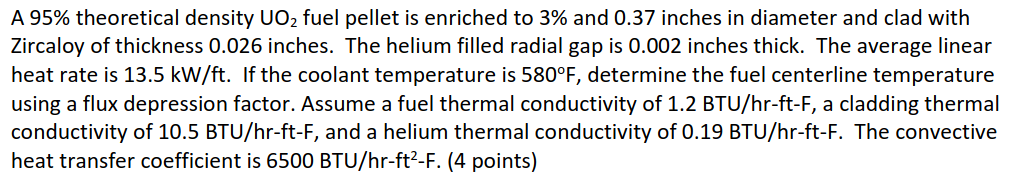

In [2]:
# Given Information
n = 0.03
D = 0.37/12 #in to ft
t_cladding = 0.026/12 #in to ft
t_gap = 2e-3/12 #in to ft
q_prime = 13.5*3.412e3 #kW/ft to BTU/hr/ft
T_bulk = 580 #F
k_fuel = 1.2 #BTU/hr/ft/F
k_cladding = 10.5 #BTU/hr/ft/F
k_gap = 0.19 #BTU/hr/ft/F
h = 6500 #BTU/hr/ft^2/F

In [3]:
#Assuming constant heat generation and fuel thermal conductivity:
R_cladding_outer = D/2 + t_gap + t_cladding #ft
R_cladding_inner = D/2 + t_gap #ft
R_pellet = D/2 #ft
h_gap = k_gap / (R_cladding_inner - D/2 + 14.4e-6) #BTU/hr/ft^2/F

#Find f
f = 0.96 #From slides


T_max = f*q_prime*(1/2/np.pi/R_cladding_outer/h + \
                   np.log(R_cladding_outer/R_cladding_inner)/2/np.pi/k_cladding + \
                   1/2/np.pi/R_pellet/h_gap + \
                   1/4/np.pi/k_fuel) \
+ T_bulk

answer_print('Problem 1', f' The centerline temperature is {T_max:.2f} F')


=========FINAL ANSWER=========
Problem 1:
 The centerline temperature is 4095.69 F
=========FINAL ANSWER=========



# Problem 2
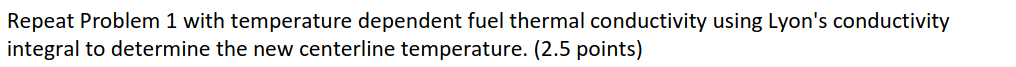

In [4]:
#First, let's get to the temperature at the fuel pellet surface

T_surf = f*q_prime*(1/2/np.pi/R_cladding_outer/h +\
                    np.log(R_cladding_outer/R_cladding_inner)/2/np.pi/k_cladding +\
                    1/2/np.pi/R_pellet/h_gap) +\
T_bulk

print(f'The surface temperature is {(T_surf-32)*5/9:.2f} C')

The surface temperature is 628.50 C


$$ \int_{T_{surf}}^{T_{max}} k_f dT = \frac{f q'}{4 \pi} $$

$$ \int_{0}^{T_{max}} k_f dT - \int_0^{T_{surf}} k_f dT = \frac{f q'}{4 \pi} $$

$$ \int_{0}^{T_{max}} k_f dT  = \frac{f q'}{4 \pi} + \int_0^{T_{surf}} k_f dT$$

In [5]:
#Lyon's Integral Values pulled from the slides given T_surf
lyon_surf = 37.5*57.818 #W/cm -> BTU/hr/ft
lyon_max = f*q_prime/4/np.pi + lyon_surf
print(f'The Lyon integral value for the maximum temperature is {lyon_max/57.818:.0f} W/cm')

answer_print('Problem 2', f'The max temperature is approximately {2800*9/5+32:.0f} F') #From slides, converted to F

The Lyon integral value for the maximum temperature is 98 W/cm

=========FINAL ANSWER=========
Problem 2:
The max temperature is approximately 5072 F
=========FINAL ANSWER=========



# Problem 3
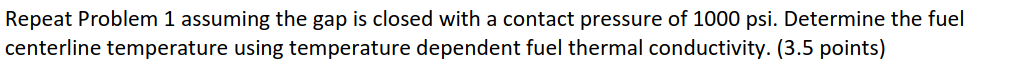

In [6]:
h_gap_closed = 0.68*1e3 + k_gap/14.4e-6

T_surf = f*q_prime*(1/2/np.pi/R_cladding_outer/h +\
                    np.log(R_cladding_outer/R_cladding_inner)/2/np.pi/k_cladding +\
                    1/2/np.pi/R_pellet/h_gap_closed) +\
T_bulk

print(f'The surface temperature is {(T_surf-32)*5/9:.2f} C')

lyon_surf = 24.75*57.818 #W/cm -> BTU/hr/ft
lyon_max = f*q_prime/4/np.pi + lyon_surf
print(f'The lyon integral value for the maximum temperature is {lyon_max/57.818:.0f} W/cm')

answer_print('Problem 3', f'The max temperature is approximately {2575*9/5+32:.0f} F')

The surface temperature is 405.09 C
The lyon integral value for the maximum temperature is 86 W/cm

=========FINAL ANSWER=========
Problem 3:
The max temperature is approximately 4667 F
=========FINAL ANSWER=========

